___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [33]:
df=pd.read_csv('KNN_Project_Data',index_col=0)

**Check the head of the dataframe.**

In [34]:
df.head()

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
XVPM,,,,,,,,,,
1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

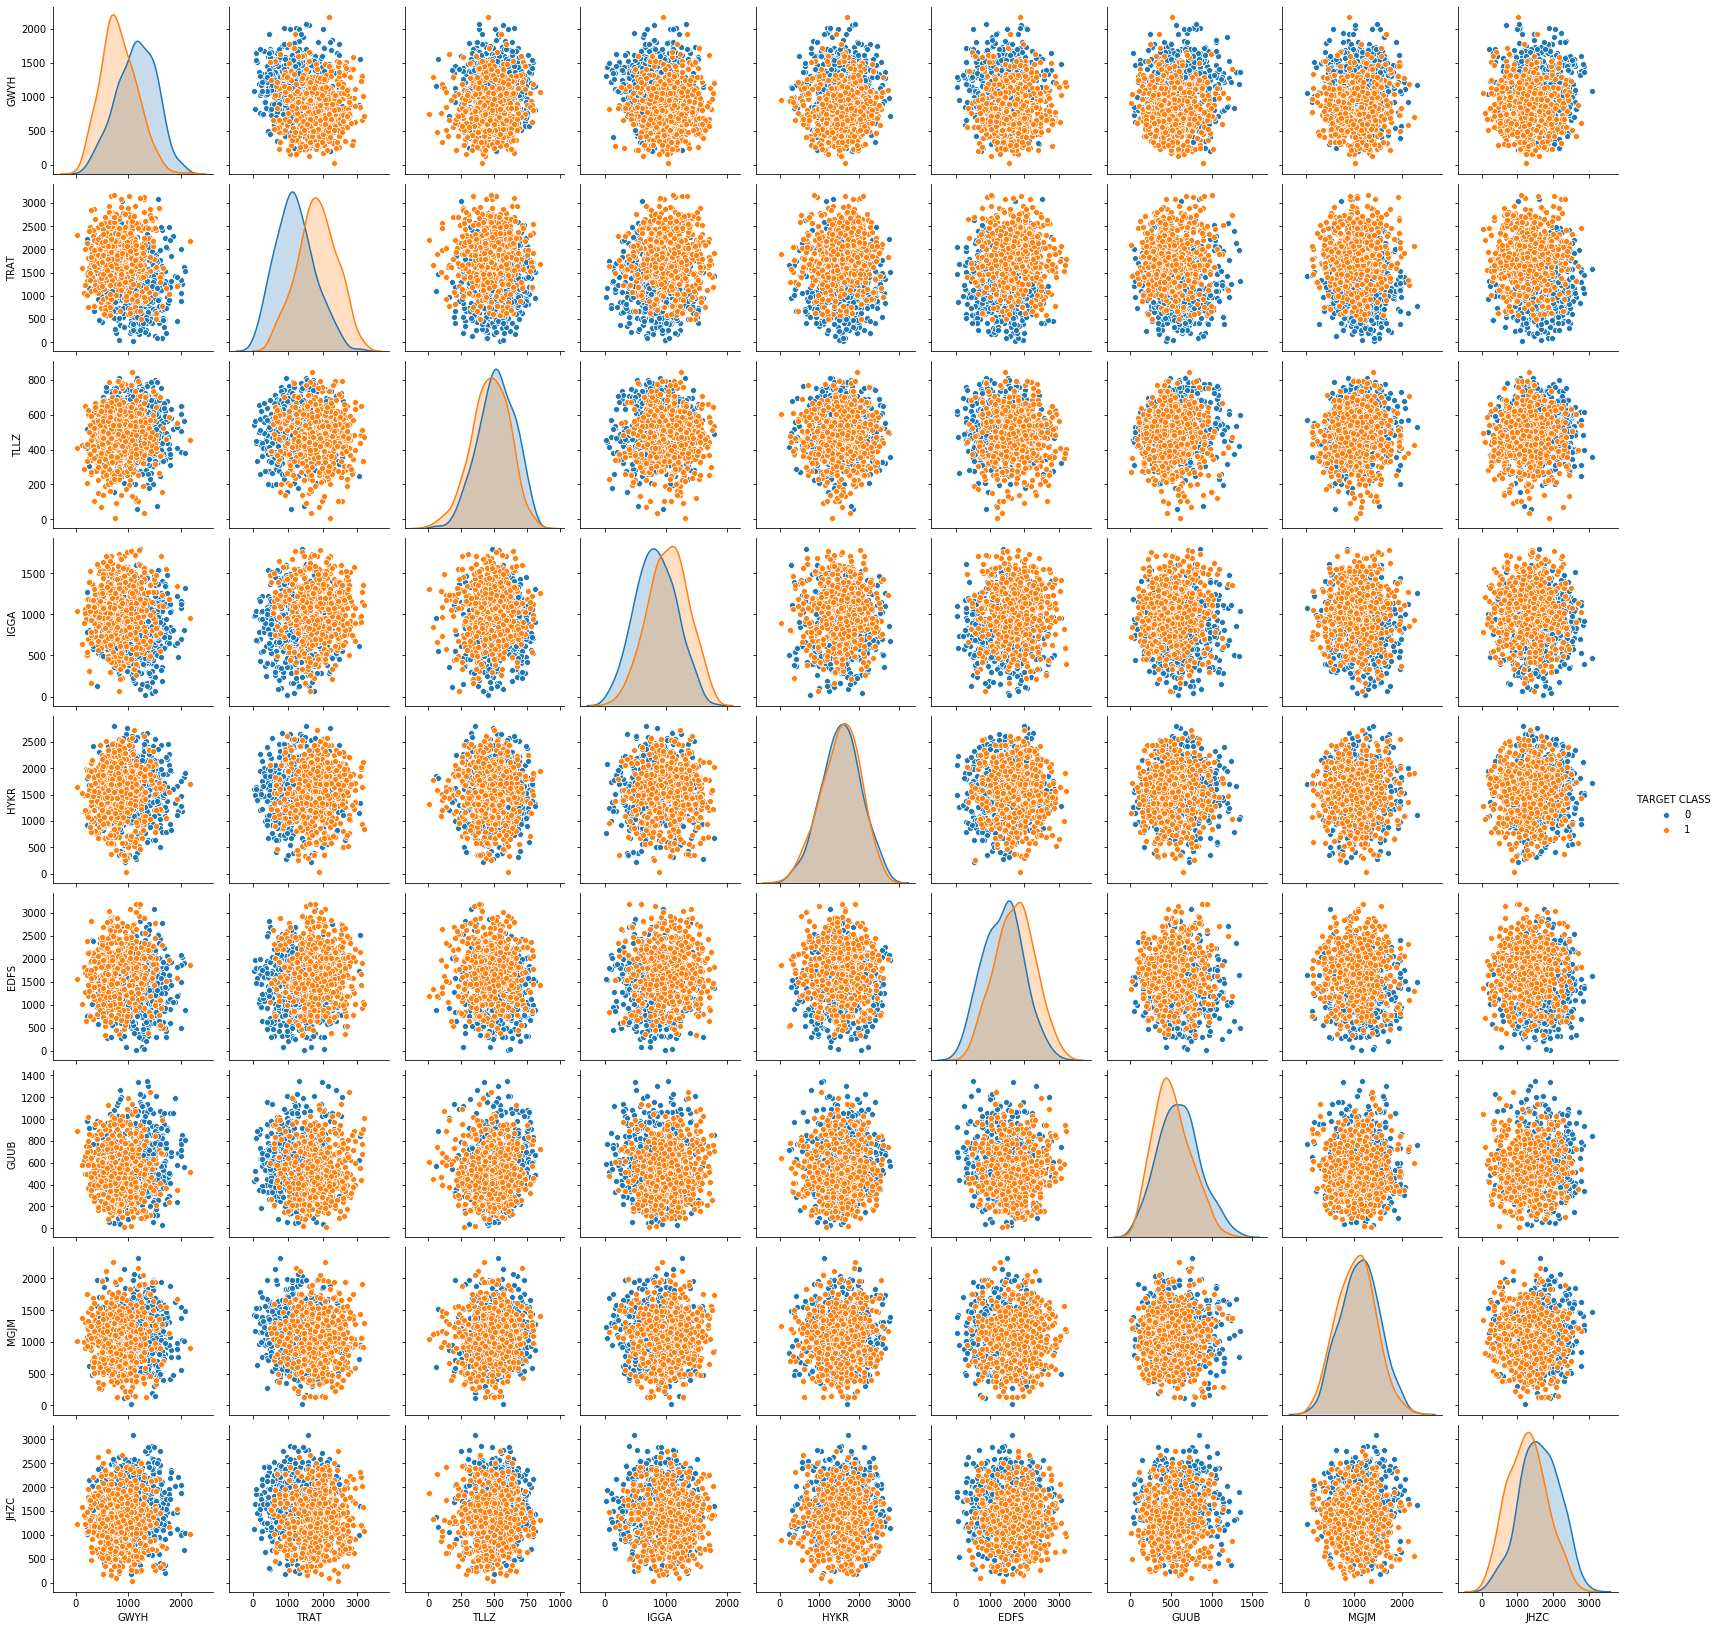

In [35]:
sns.pairplot(df, hue='TARGET CLASS')

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [36]:
from sklearn.preprocessing import StandardScaler

** Create a StandardScaler() object called scaler.**

In [37]:
scaler = StandardScaler()

** Fit scaler to the features.**

In [38]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [39]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [40]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [41]:
from sklearn.model_selection import train_test_split
x = df_feat
y = df['TARGET CLASS']

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [43]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [44]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [45]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [46]:
p = knn.predict(x_test)

** Create a confusion matrix and classification report.**

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:

print(confusion_matrix(y_test,p))

[[ 94  43]
 [ 35 128]]


In [49]:
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       137
           1       0.75      0.79      0.77       163

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [53]:
error_rate=[]

for i in range (1,40): 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test))


[0.26,
 0.27666666666666667,
 0.23333333333333334,
 0.23,
 0.21666666666666667,
 0.24666666666666667,
 0.22333333333333333,
 0.25,
 0.21666666666666667,
 0.23,
 0.19666666666666666,
 0.21333333333333335,
 0.2,
 0.21333333333333335,
 0.2,
 0.20666666666666667,
 0.21333333333333335,
 0.20333333333333334,
 0.19333333333333333,
 0.19,
 0.18666666666666668,
 0.19333333333333333,
 0.20333333333333334,
 0.2,
 0.19333333333333333,
 0.18666666666666668,
 0.18666666666666668,
 0.20333333333333334,
 0.19333333333333333,
 0.20333333333333334,
 0.19666666666666666,
 0.20333333333333334,
 0.19666666666666666,
 0.20333333333333334,
 0.19666666666666666,
 0.19666666666666666,
 0.20333333333333334,
 0.2,
 0.2]

**Now create the following plot using the information from your for loop.**

Text(0, 0.5, 'Error Rate')

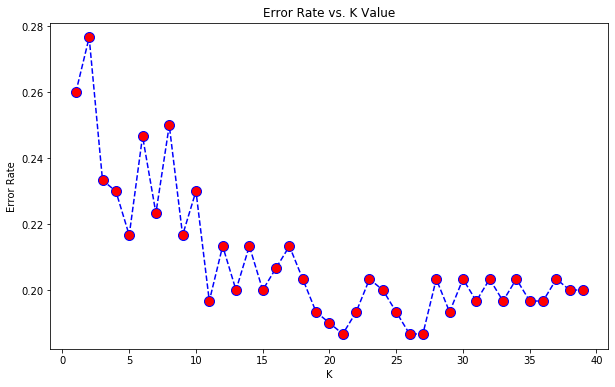

In [55]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [60]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[109  28]
 [ 28 135]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       137
           1       0.83      0.83      0.83       163

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



# Great Job!